In [1]:









import datetime
import pytz
import math
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta













In [2]:








# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1










In [3]:








def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        










In [4]:










## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))












In [5]:





df = getQuotes(frameM30, 2023)
df








,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7435,1691184600,1.10184,1.10189,1.10082,1.10087,1995,8,0
7436,1691186400,1.10088,1.10105,1.10060,1.10079,1532,8,0
7437,1691188200,1.10079,1.10083,1.10034,1.10073,1335,8,0
7438,1691190000,1.10073,1.10076,1.10036,1.10071,814,8,0


In [6]:


shortTerm = 3
longTerm = 144

df[f'std-{shortTerm}'] = df['close'].rolling(window=shortTerm).std()
df[f'std-{longTerm}'] = df['close'].rolling(window=longTerm).std()
df['alpha'] = (df[f'std-{shortTerm}'] / df[f'std-{longTerm}']) * 0.20
df['vama'] = 0
df = df.dropna()

for i in range(len(df)):
    closingPrice = df['close'].iloc[i]
    alphaValue = df['alpha'].iloc[i]
    if i == 0:
        df.loc[df.index[i], 'vama'] = df['close'].iloc[i]
    else:
        df.loc[df.index[i], 'vama'] = (df['alpha'].iloc[i] * df['close'].iloc[i]) + (1 - df['alpha'].iloc[i]) * df['vama'].iloc[i - 1]




In [7]:


df



,time,open,high,low,close,tick_volume,spread,real_volume,std-3,std-144,alpha,vama
143,1672875000,1.06059,1.06073,1.06019,1.06028,1459,7,0,0.000177,0.005443,0.006494,1.060280
144,1672876800,1.06020,1.06027,1.06001,1.06023,113,31,0,0.000201,0.005413,0.007417,1.060280
145,1672878600,1.06024,1.06057,1.06001,1.06050,3774,30,0,0.000144,0.005385,0.005335,1.060281
146,1672880400,1.06054,1.06066,1.06023,1.06050,2169,7,0,0.000156,0.005350,0.005828,1.060282
147,1672882200,1.06051,1.06110,1.06045,1.06057,1383,7,0,0.000040,0.005308,0.001523,1.060283
...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1691184600,1.10184,1.10189,1.10082,1.10087,1995,8,0,0.000970,0.002989,0.064911,1.099475
7436,1691186400,1.10088,1.10105,1.10060,1.10079,1532,8,0,0.000579,0.003011,0.038440,1.099526
7437,1691188200,1.10079,1.10083,1.10034,1.10073,1335,8,0,0.000070,0.003031,0.004635,1.099531
7438,1691190000,1.10073,1.10076,1.10036,1.10071,814,8,0,0.000042,0.003050,0.002730,1.099535


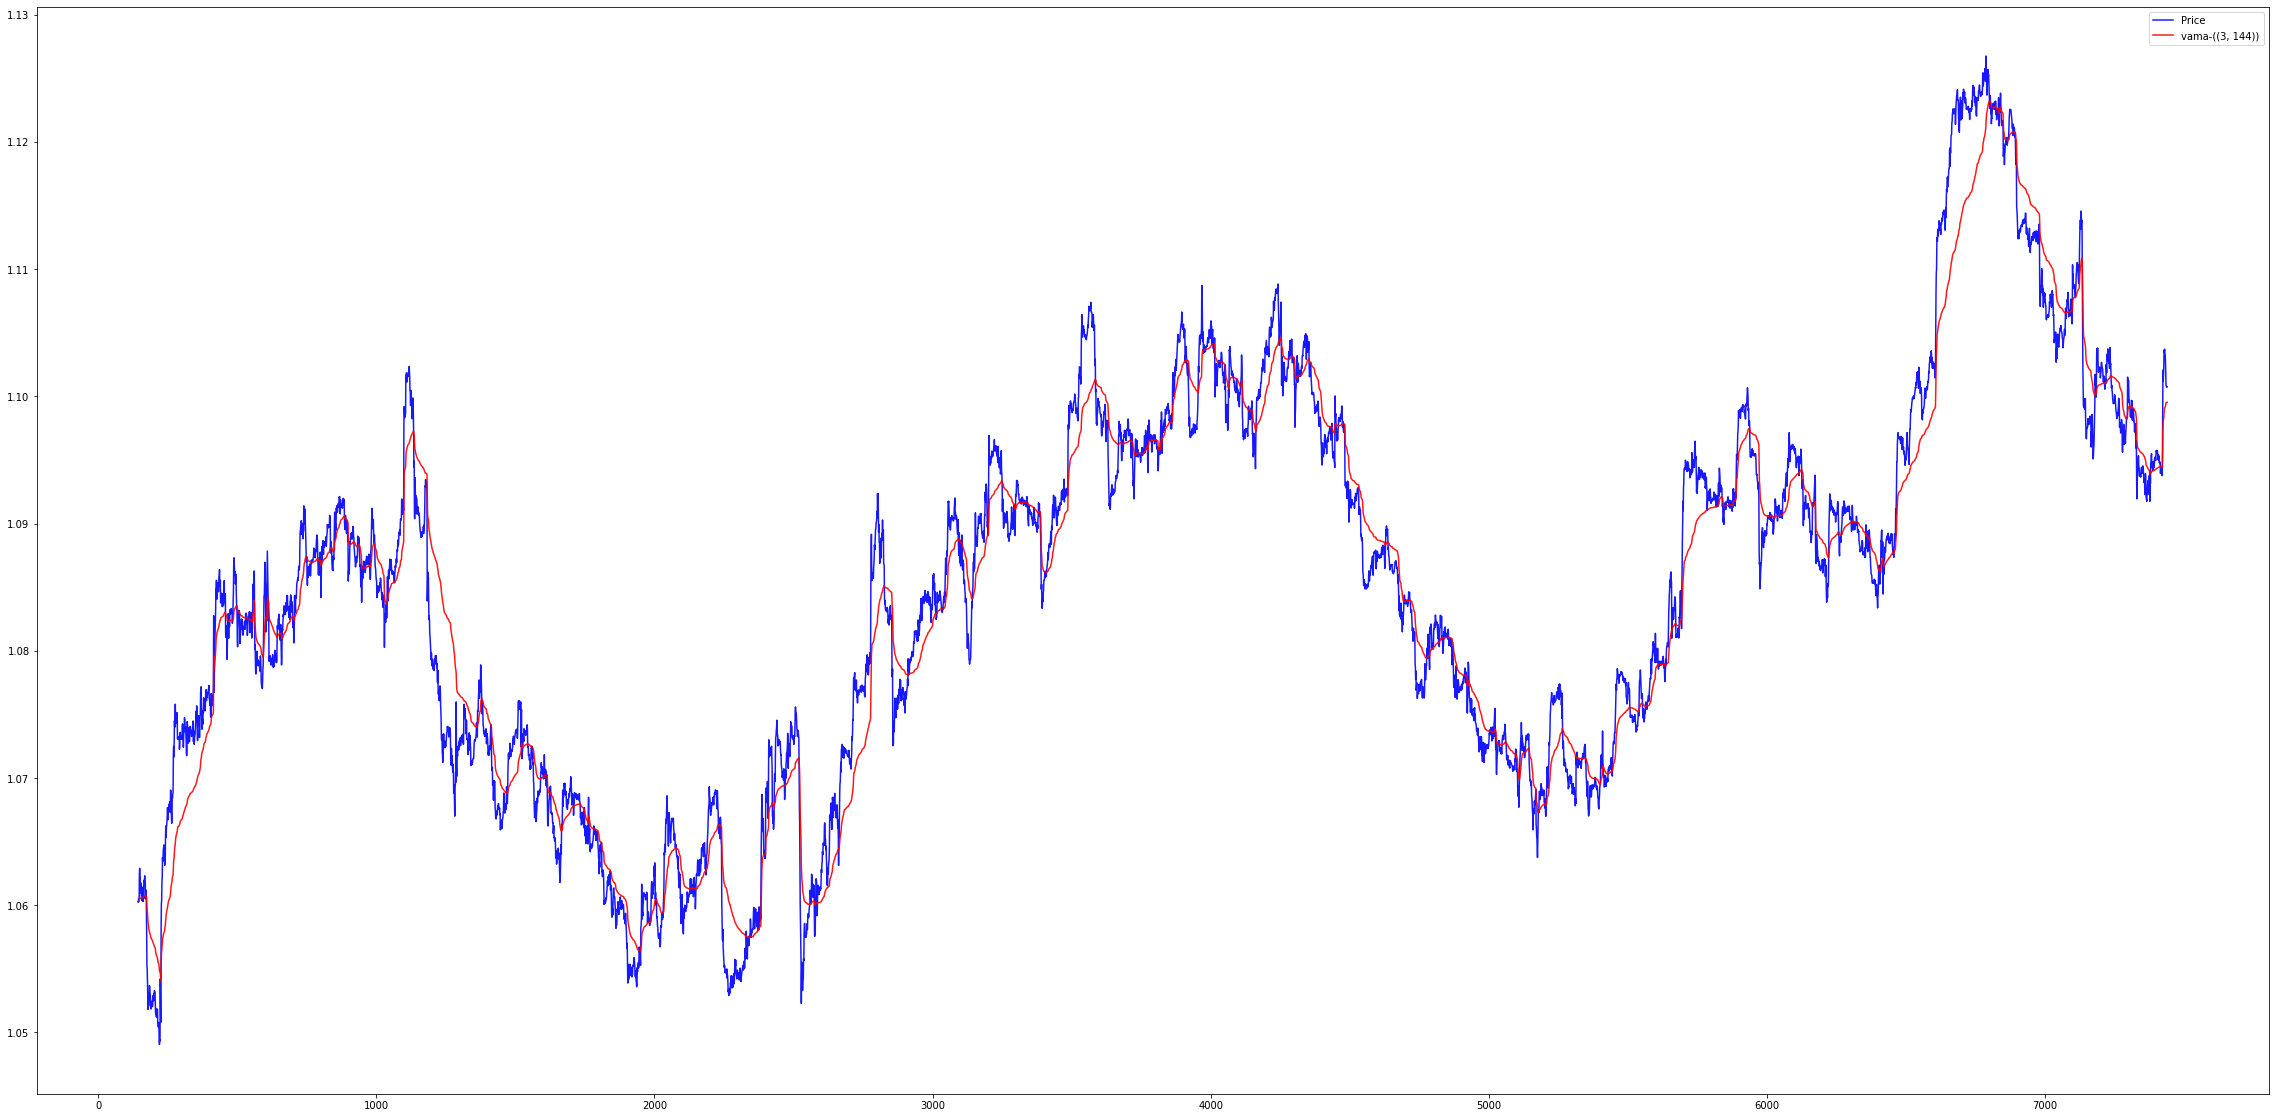

In [8]:






## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

## Plotting the VAMA
plt.plot(df['vama'], label=f'vama-({shortTerm, longTerm})', c='red', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()







